<a href="https://colab.research.google.com/github/TE-Yoon/ML-training/blob/main/Chip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

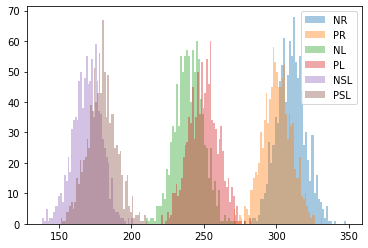

In [ ]:
# Vt generation
SIG = 10
NR = 310
PR = 300
NL = 240
PL = 250
NSL = 170
PSL = 180
vt = [310,300,240,250,170,180]
num = 1000

Vt_NR = np.random.normal(NR,SIG,num)
Vt_PR = np.random.normal(PR,SIG,num)
Vt_NL = np.random.normal(NL,SIG,num)
Vt_PL = np.random.normal(PL,SIG,num)
Vt_NSL = np.random.normal(NSL,SIG,num)
Vt_PSL = np.random.normal(PSL,SIG,num)

import matplotlib.pyplot as plt
plt.hist(Vt_NR, bins=50, label='NR', alpha=0.4)
plt.hist(Vt_PR, bins=50, label='PR', alpha=0.4)
plt.hist(Vt_NL, bins=50, label='NL', alpha=0.4)
plt.hist(Vt_PL, bins=50, label='PL', alpha=0.4)
plt.hist(Vt_NSL, bins=50, label='NSL', alpha=0.4)
plt.hist(Vt_PSL, bins=50, label='PSL', alpha=0.4)
plt.legend(loc='best')
plt.show()

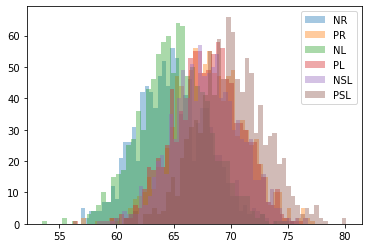

In [ ]:
# Swing generation
sSIG = 3
sNR = 65
sPR = 68
sNL = 65
sPL = 68
sNSL = 68
sPSL = 70
ss = [65,68,65,68,68,70]
num = 1000

SS_NR = np.random.normal(sNR,sSIG,num)
SS_PR = np.random.normal(sPR,sSIG,num)
SS_NL = np.random.normal(sNL,sSIG,num)
SS_PL = np.random.normal(sPL,sSIG,num)
SS_NSL = np.random.normal(sNSL,sSIG,num)
SS_PSL = np.random.normal(sPSL,sSIG,num)

import matplotlib.pyplot as plt
plt.hist(SS_NR, bins=50, label='NR', alpha=0.4)
plt.hist(SS_PR, bins=50, label='PR', alpha=0.4)
plt.hist(SS_NL, bins=50, label='NL', alpha=0.4)
plt.hist(SS_PL, bins=50, label='PL', alpha=0.4)
plt.hist(SS_NSL, bins=50, label='NSL', alpha=0.4)
plt.hist(SS_PSL, bins=50, label='PSL', alpha=0.4)
plt.legend(loc='best')
plt.show()

In [ ]:
# voltage 는 모두 mV 단위, body effect 는 무시
Ioff = 100
# Vt = 300
# Vgs 는 sweep (0~Vt)
# Vgs = np.linspace(0,Vt,100)
Vds = 50
Vdd = 750
dibl_coeff = 1.5
Swing = 70

thermal_voltage = 26 # will revise for temperature dependency

def Leakage():
  return Ioff * 10**((Vgs + dibl_coeff*(Vds-Vdd))/Swing) * (1-np.exp(-Vds/thermal_voltage))

def Leakage_Vt(Vt,SS):
  return Ioff * 10**(-Vt/SS)

def Freq_Vt(Vt,Vdd):
  return (Vdd-Vt) **2

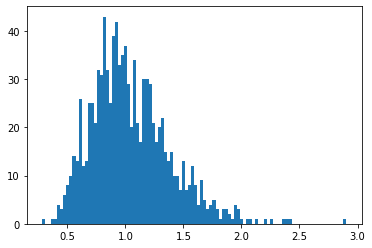

In [ ]:
IDS = Leakage_Vt(Vt_NR,70) 
IDS2 = IDS/Leakage_Vt(NR,70)
plt.hist(IDS2, bins=100)
plt.show()

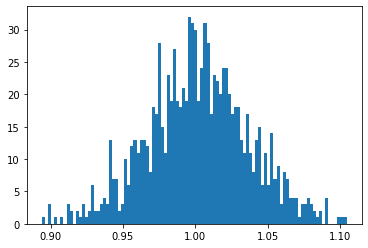

In [ ]:
ASV = Freq_Vt(Vt_PSL,750)
ASV2 = ASV / Freq_Vt(PSL,750)
plt.hist(ASV2, bins=100)
plt.show()

In [ ]:
idscoef = np.array([0.35, 0.35, 0.10, 0.10, 0.05 , 0.05])
freqcoef = np.array([0.05, 0.05, 0.10, 0.10, 0.35 , 0.35]) 

In [ ]:
import pandas as pd

df = pd.DataFrame({'NR':Vt_NR , 'PR':Vt_PR, 'NL':Vt_NL , 'PL':Vt_PL, 'NSL':Vt_NSL , 'PSL':Vt_PSL
                   ,'SSNR':SS_NR , 'SSPR':SS_PR, 'SSNL':SS_NL , 'SSPL':SS_PL, 'SSNSL':SS_NSL , 'SSPSL':SS_PSL})
df['Ids'] = 0
df['freq'] = 0
vt_list = df.columns
df.head()

,NR,PR,NL,PL,NSL,PSL,SSNR,SSPR,SSNL,SSPL,SSNSL,SSPSL,Ids,freq
0,314.967142,313.993554,233.248217,230.921924,161.365064,175.762403,61.657756,70.355555,64.900924,70.296206,65.964516,66.465461,0,0
1,308.617357,309.246337,238.554813,241.396150,169.687965,175.465859,63.107207,62.666957,63.489049,71.220238,67.083502,71.298551,0,0
2,316.476885,300.596304,232.075801,245.863945,170.180169,162.043568,62.173819,70.144237,64.482875,69.496070,66.207857,73.332260,0,0
3,325.230299,293.530632,236.920385,268.876877,174.726303,176.699098,63.356013,67.298828,67.144195,62.172507,68.331254,72.265555,0,0
4,307.658466,306.982233,221.063853,255.565531,156.331416,187.328291,64.357549,70.122373,68.833570,67.533733,71.591536,73.253433,0,0


In [ ]:
for i in range(len(df)):
  ids = 0
  freq = 0
  for j in range(6):
    ids = ids + Leakage_Vt(df[vt_list[j]].iloc[i],df[vt_list[6+j]].iloc[i])*idscoef[j]
    freq = freq + Freq_Vt(df[vt_list[j]].iloc[i], 750)*freqcoef[j]
  df['Ids'].iloc[i] = ids + np.random.normal(0, 0.00)
  df['freq'].iloc[i] = freq + np.random.normal(0,0)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
idstarget = 0
freqtarget = 0
for i in range(6):
  idstarget = idstarget + Leakage_Vt(vt[i],ss[i])*idscoef[i]
  freqtarget = freqtarget + Freq_Vt(vt[i],750)*freqcoef[i]

print(idstarget,freqtarget)

0.03531370473057743 302270.0


In [ ]:
df.to_csv('ids-freq.csv')

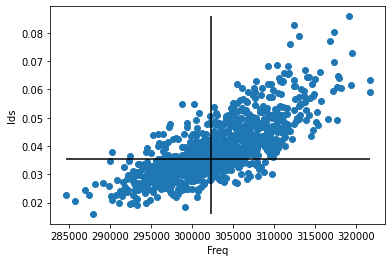

In [ ]:
plt.scatter(x=df['freq'] , y=df['Ids'])
# plt.semilogy()
plt.vlines(x=freqtarget, ymin=df['Ids'].min(), ymax=df['Ids'].max())
plt.hlines(y=idstarget, xmin=df['freq'].min(), xmax=df['freq'].max())

plt.xlabel('Freq')
plt.ylabel('Ids')
plt.show()

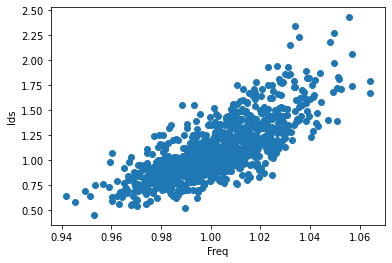

In [ ]:
plt.scatter(x=df['freq']/freqtarget , y=df['Ids']/idstarget)
# plt.semilogy()

plt.xlabel('Freq')
plt.ylabel('Ids')
plt.show()

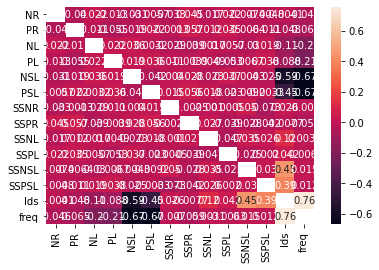

In [ ]:
cormat = df.corr()
fil_cormat = cormat[cormat != 1]
import seaborn as sns

sns.heatmap(fil_cormat, annot=True)

In [ ]:
np.abs(fil_cormat['Ids']).sort_values(ascending=False)
np.abs(fil_cormat['freq']).sort_values(ascending=False)


Ids      0.759191
NSL      0.667515
PSL      0.666294
PL       0.211887
NL       0.203569
PR       0.064667
SSPR     0.058920
NR       0.046260
SSNSL    0.015369
SSPSL    0.011594
SSNR     0.007011
SSPL     0.006294
SSNL     0.003081
freq          NaN
Name: freq, dtype: float64

In [ ]:
dfids = df[['NSL', 'PSL', 'Ids']]
dfheatmap = dfids.pivot('NSL', 'PSL', 'Ids')
dfheatmap.head()

PSL,151.004861,151.669697,152.608598,154.464504,154.682307,154.777221,154.934284,155.646877,155.963314,156.156932,156.859559,156.957881,157.339479,157.505675,157.764258,157.917192,157.987565,158.056175,158.220323,158.462694,158.760524,158.952505,159.142076,159.253600,159.255136,160.011111,160.240367,160.326749,160.426614,160.449512,160.950555,160.953253,161.072378,161.265587,161.469815,161.534270,161.792397,161.929586,162.017853,162.043568,...,197.311696,197.665118,197.681693,197.847750,198.014301,198.076085,198.188985,198.884369,198.987350,199.002684,199.422456,199.598373,199.913704,200.225902,200.358735,200.421779,200.538187,200.682260,200.826603,200.847129,200.982215,201.052974,201.850949,202.314989,202.758254,202.770865,203.246733,203.817135,203.943619,204.974151,205.009005,205.393816,205.719953,205.879090,207.030276,208.243306,209.181736,209.272701,209.356579,210.982994
NSL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
138.232962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138.295743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139.923677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140.857440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141.453733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nmin = dfids['NSL'].min()
nmax = dfids['NSL'].max()
nbins = np.linspace(nmin,nmax,100)

pmin = dfids['PSL'].min()
pmax = dfids['PSL'].max()
pbins = np.linspace(pmin,pmax,100)

dfids['nbin'] = pd.cut(dfids['NSL'], bins=nbins, include_lowest=True)
dfids['pbin'] = pd.cut(dfids['PSL'], bins=pbins, include_lowest=True)

dfheat2 = dfids.groupby(by=['nbin','pbin'],).mean()
dfheat2.dropna(inplace=True)
dfheat2.set_index('NSL', inplace=True)
dfheat2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,PSL,Ids
NSL,,
138.295743,167.851939,0.061526
138.232962,186.979740,0.061183
139.923677,171.535657,0.085866
140.857440,187.070324,0.048383
141.453733,174.940338,0.048510
...,...,...
195.490097,175.297967,0.028282
197.552177,178.619177,0.024570
198.146544,179.779651,0.025006


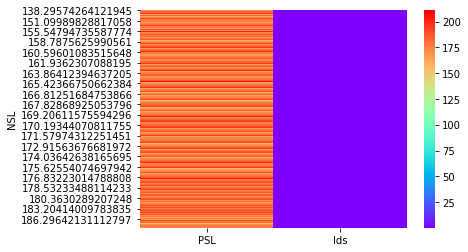

In [ ]:
# plt.pcolor(dfheatmap)
# plt.colorbar()
sns.heatmap(dfheat2, cmap='rainbow', )
plt.show()

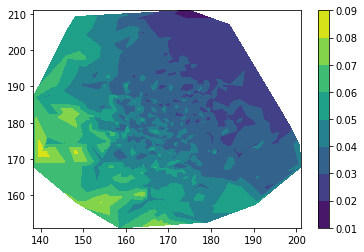

In [ ]:
fig , ax = plt.subplots()
cs = ax.tricontourf(df['NSL'],df['PSL'],df['Ids'])
fig.colorbar(cs)
plt.show()

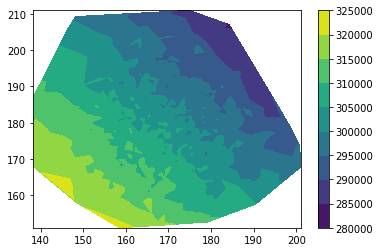

In [ ]:
plt.tricontourf(df['NSL'],df['PSL'],df['freq'])
plt.colorbar()
plt.show()

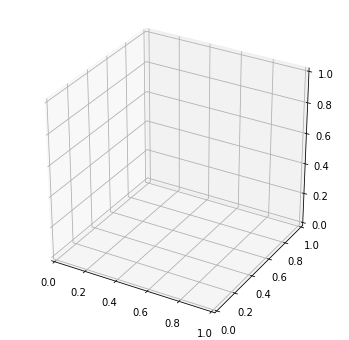

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 6))
ax = fig.gca(projection='3d')
# ax.scatter3D(df['PSL'], df['NSL'], df['Ids'], c=df['Ids'], alpha=0.5)
# ax.view_init(15,45)
# plt.show()